# Установка opencv

In [1]:
!pip install opencv-contrib-python==4.3.0.36
!pip install opencv-python==4.2.0.34

     |████████████████████████████████| 49.9MB 58kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30
     |████████████████████████████████| 28.2MB 117kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


# Подключение библиотек


1.   cv2 - организация подключения моделей к программе.
2.   matplotlib - визуализация информации.
3.   numpy - работы с числами.
4.   os - доступ к директориям.









In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
import os

# Подключение моделей и фейс - детектора

In [3]:
age_model = cv2.dnn.readNetFromCaffe('/content/drive/MyDrive/detection/age.prototxt', '/content/drive/MyDrive/detection/dex_chalearn_iccv2015.caffemodel')
gender_model = cv2.dnn.readNetFromCaffe('/content/drive/MyDrive/detection/gender.prototxt', '/content/drive/MyDrive/detection/gender.caffemodel')

detector_path = '/content/drive/MyDrive/detection/haarcascade_frontalface_default.xml'
detector = cv2.CascadeClassifier(detector_path)

# Загрузка названий изображений 

In [4]:
female_img = os.listdir('/content/drive/MyDrive/detection/img/female')

male_img  = os.listdir('/content/drive/MyDrive/detection/img/male')

# Функция выполняющая загрузку, препроцессинг, модельный анализ и вывод изображений. 

In [23]:
def predict_func(img_list, filename):
  for i in img_list:

    img = cv2.imread('/content/drive/MyDrive/detection/img/'+filename+'/'+i) # считываем изображение

    face = detector.detectMultiScale(img, 1.3, 5) # находим лицр на изображении 

    x, y, w, h = face[0] # записываем оси ординат, ширину и высоту найденого лица

    detected_face = img[int(y):int(y+h), int(x):int(x+w)] # убираем лишнюю часть изображения  
    detected_face = cv2.resize(detected_face, (224, 224)) # изменяем размер изображения
    detected_face_blob = cv2.dnn.blobFromImage(detected_face) # маштабируем лицо

    age_model.setInput(detected_face_blob) # передаем изображение модели
    age_result = age_model.forward() # собираем результат

    gender_model.setInput(detected_face_blob) # передаем изображение модели
    gender_result = gender_model.forward() # собираем результат

    if np.argmax(gender_result[0]) == 0: # переводим вероятность к доминирующему полу
      gender = 'woman'
    else:
      gender = 'man'

    # перевод вероятности в точный возраст
    indexes = np.array([i for i in range(0, 101)]) 

    apperent_age = round(np.sum(age_result[0] * indexes))
    
    # выводим изображение на экран 
    fig, ax = plt.subplots()

    ax.imshow(img[:,:,::-1])

    rect = patches.Rectangle((x,  y), w, h, linewidth=1, edgecolor='r', facecolor='none')

    ax.add_patch(rect)
    plt.text(x, y - 10, str(apperent_age) + 'y/o' + ', ' + gender, color='red')

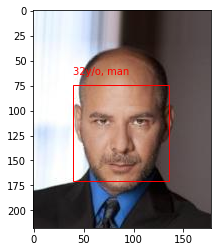

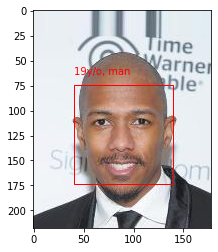

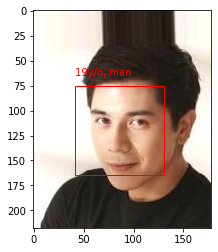

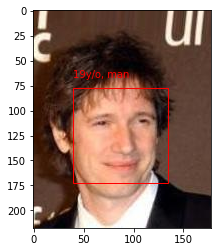

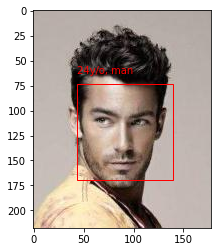

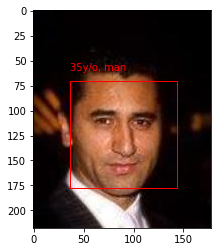

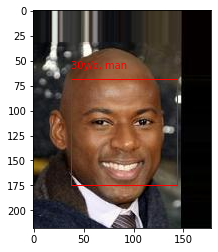

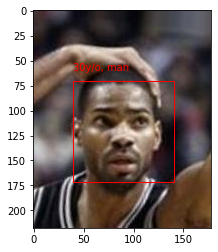

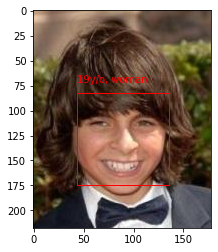

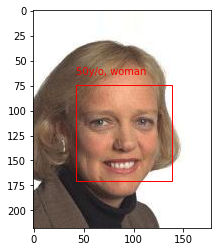

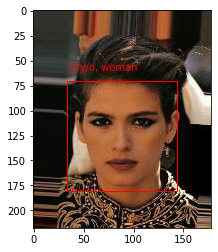

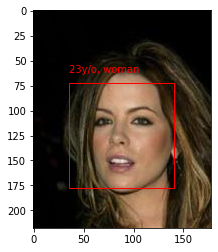

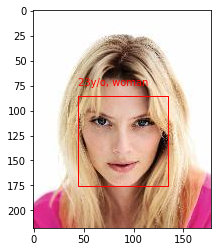

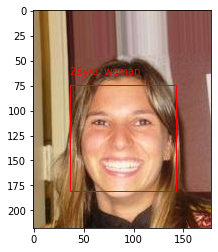

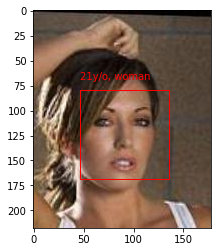

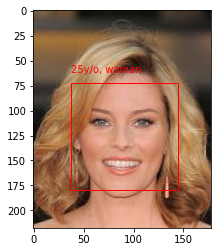

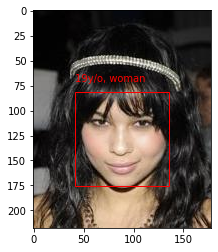

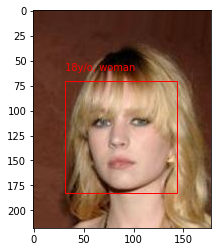

In [26]:
predict_func(male_img, 'male')
predict_func(female_img, 'female')